## Importing necessary libraries and Load the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv('C:/Users/King Betse/Downloads/data.csv')

# Dataset structure
print("Dataset Overview:")
print(data.info())  # Displays number of rows, columns, and data types

# First few rows of the dataset
print("\nFirst 5 Rows:")
print(data.head())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())  # Displays central tendency, dispersion, and shape


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  F

### Distribution of Numerical Features


Distribution of Numerical Features:


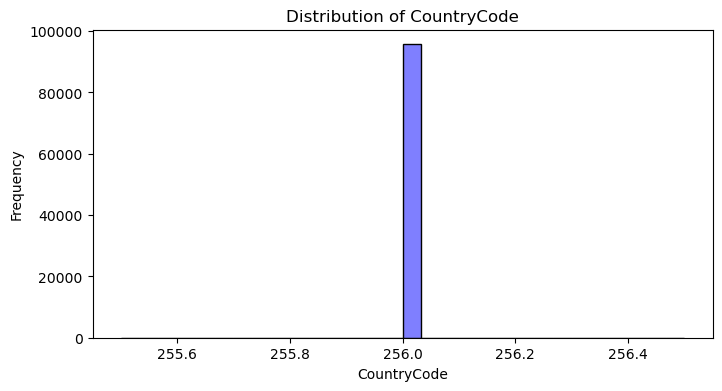

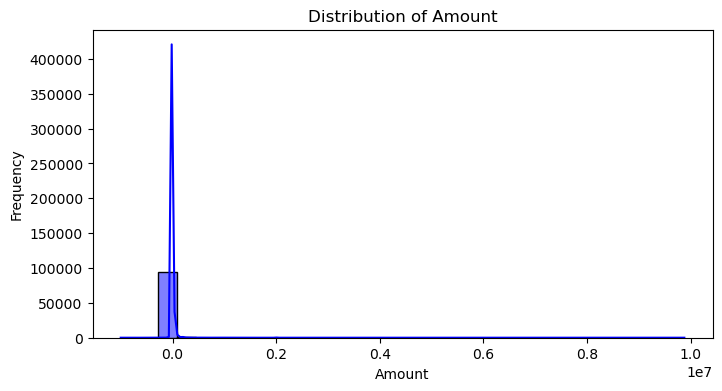

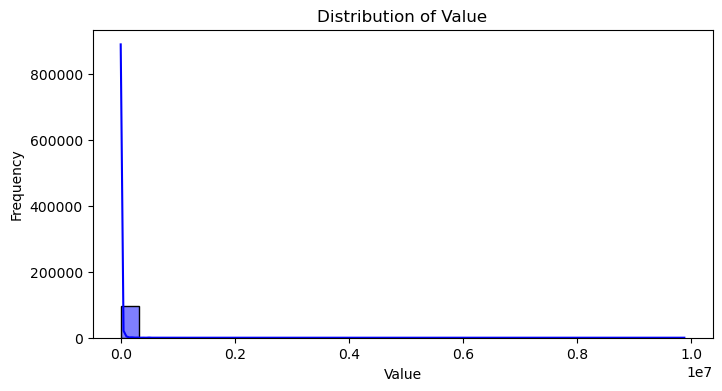

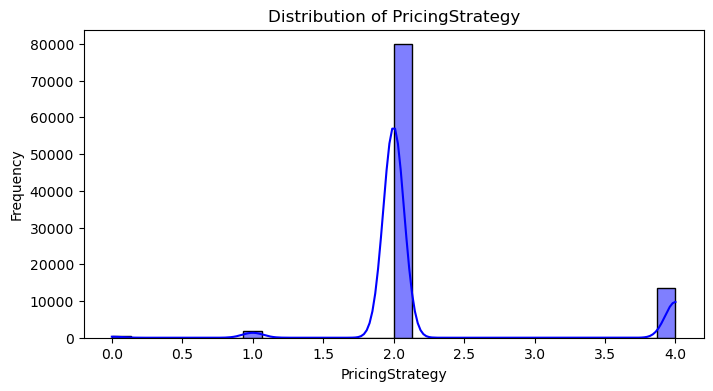

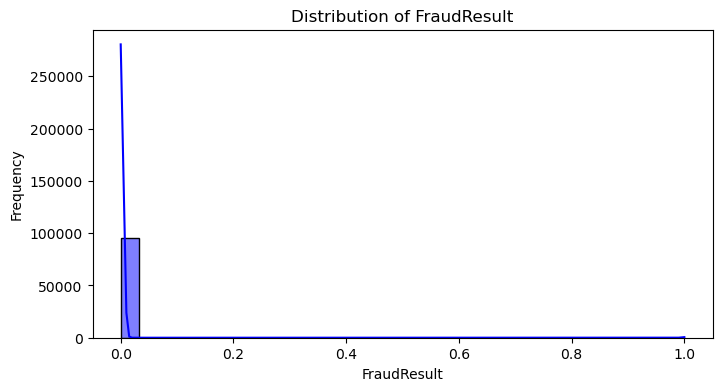

In [2]:
# Select numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Plot distribution of numerical features
print("\nDistribution of Numerical Features:")
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### Distribution of Categorical Features

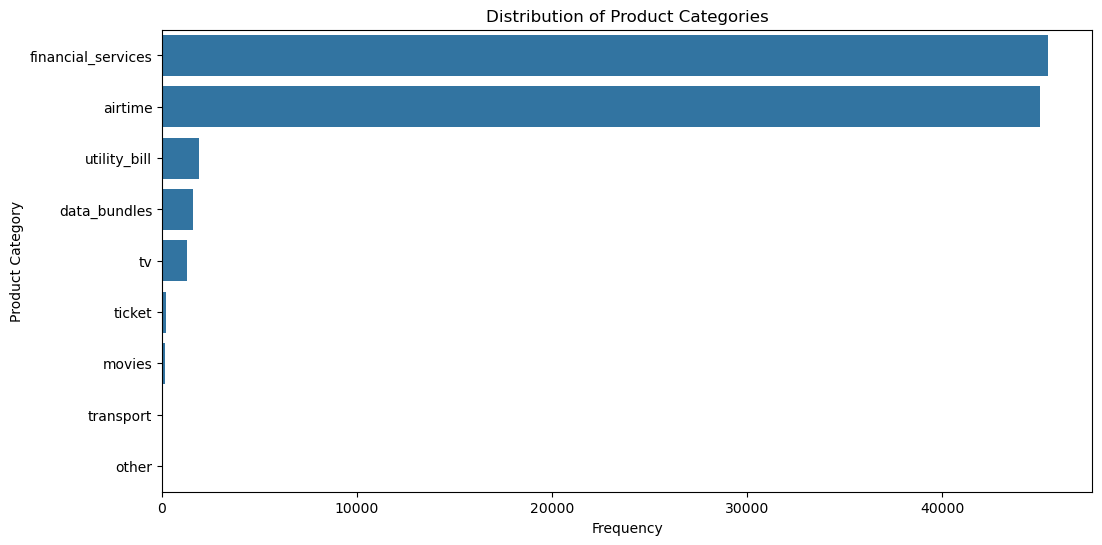

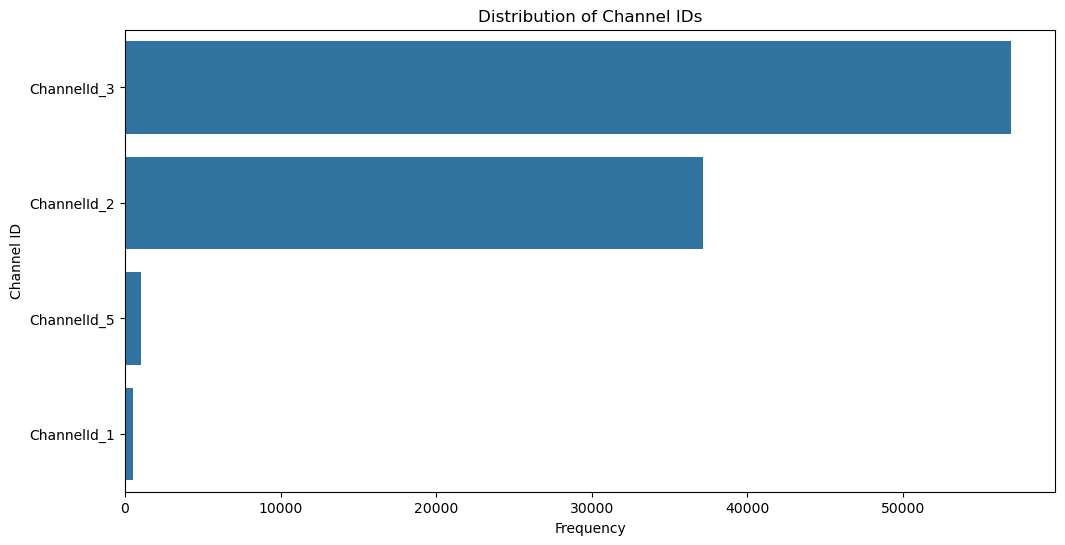

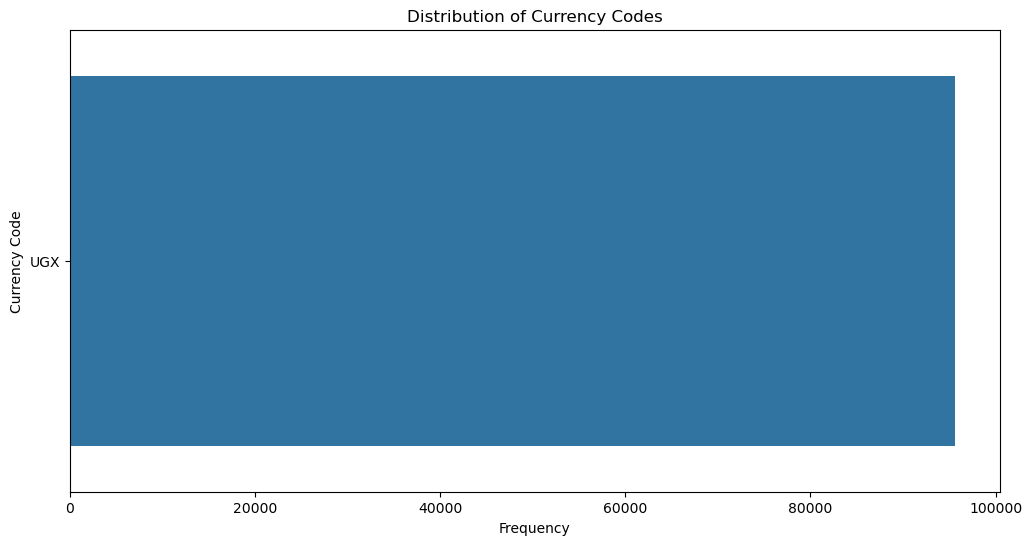

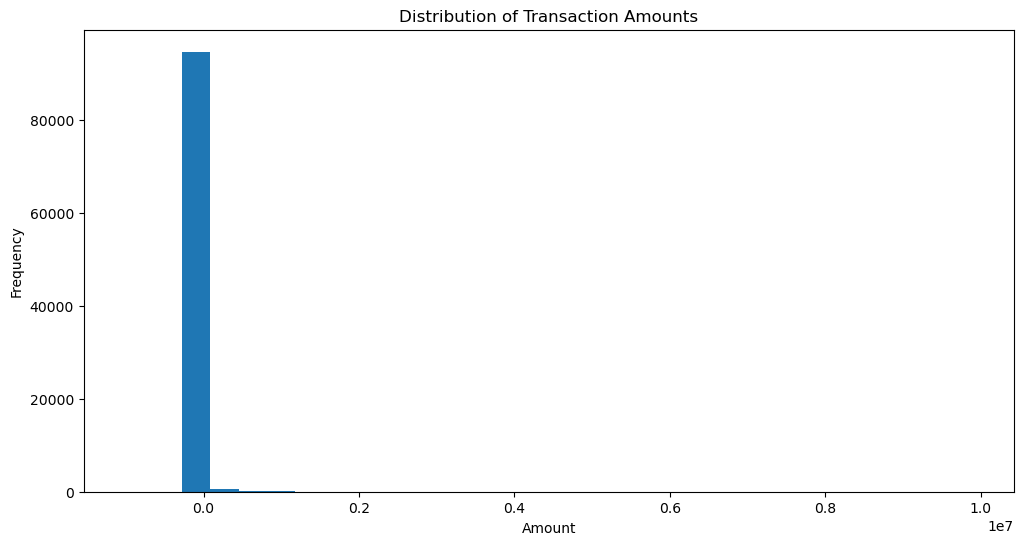

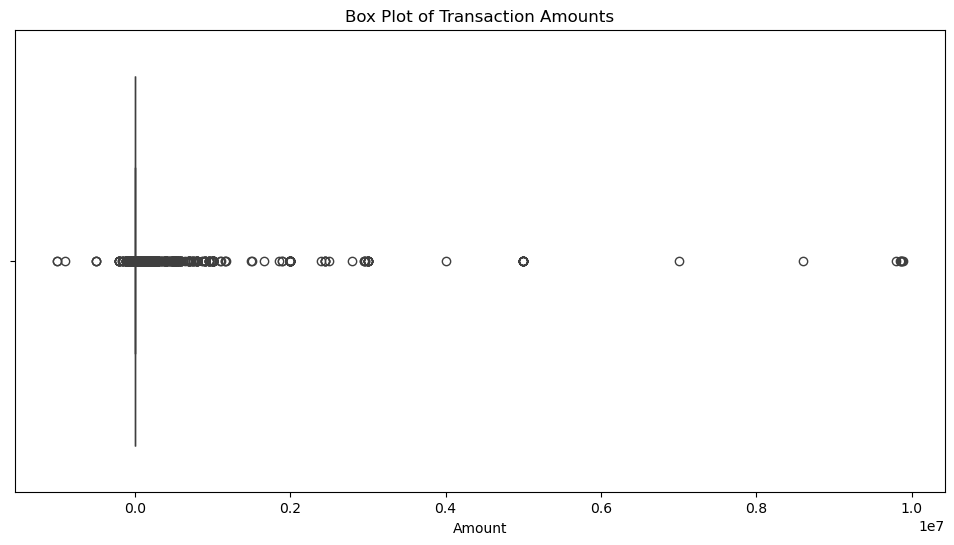

In [5]:
# Distribution of Categorical Features
# Bar plot for ProductCategory
plt.figure(figsize=(12, 6))
sns.countplot(y='ProductCategory', data=data, order=data['ProductCategory'].value_counts().index)
plt.title('Distribution of Product Categories')
plt.xlabel('Frequency')
plt.ylabel('Product Category')
plt.show()

# Bar plot for ChannelId
plt.figure(figsize=(12, 6))
sns.countplot(y='ChannelId', data=data, order=data['ChannelId'].value_counts().index)
plt.title('Distribution of Channel IDs')
plt.xlabel('Frequency')
plt.ylabel('Channel ID')
plt.show()

# Bar plot for CurrencyCode
plt.figure(figsize=(12, 6))
sns.countplot(y='CurrencyCode', data=data, order=data['CurrencyCode'].value_counts().index)
plt.title('Distribution of Currency Codes')
plt.xlabel('Frequency')
plt.ylabel('Currency Code')
plt.show()

# Distribution of 'Amount'
# Histogram
plt.figure(figsize=(12, 6))
data['Amount'].hist(bins=30)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Amount'])
plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Amount')
plt.grid(False)
plt.show()

### Correlation Analysis

Numeric columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']


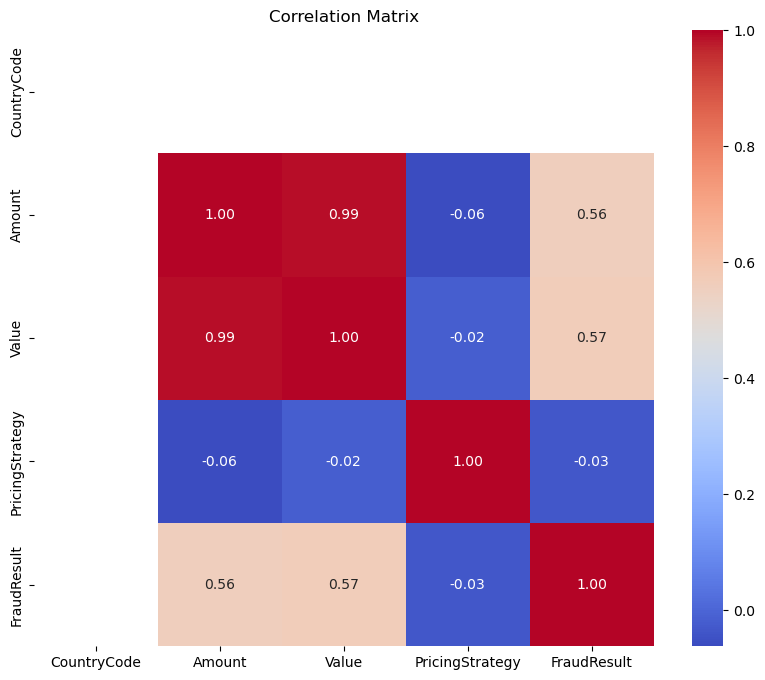

In [8]:
# Check for numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numeric columns:", numeric_columns)

# Correlation matrix using only numeric columns
correlation_matrix = data[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

###  Identifying Missing Values



Missing Values:
Series([], dtype: int64)

Visualizing Missing Data:


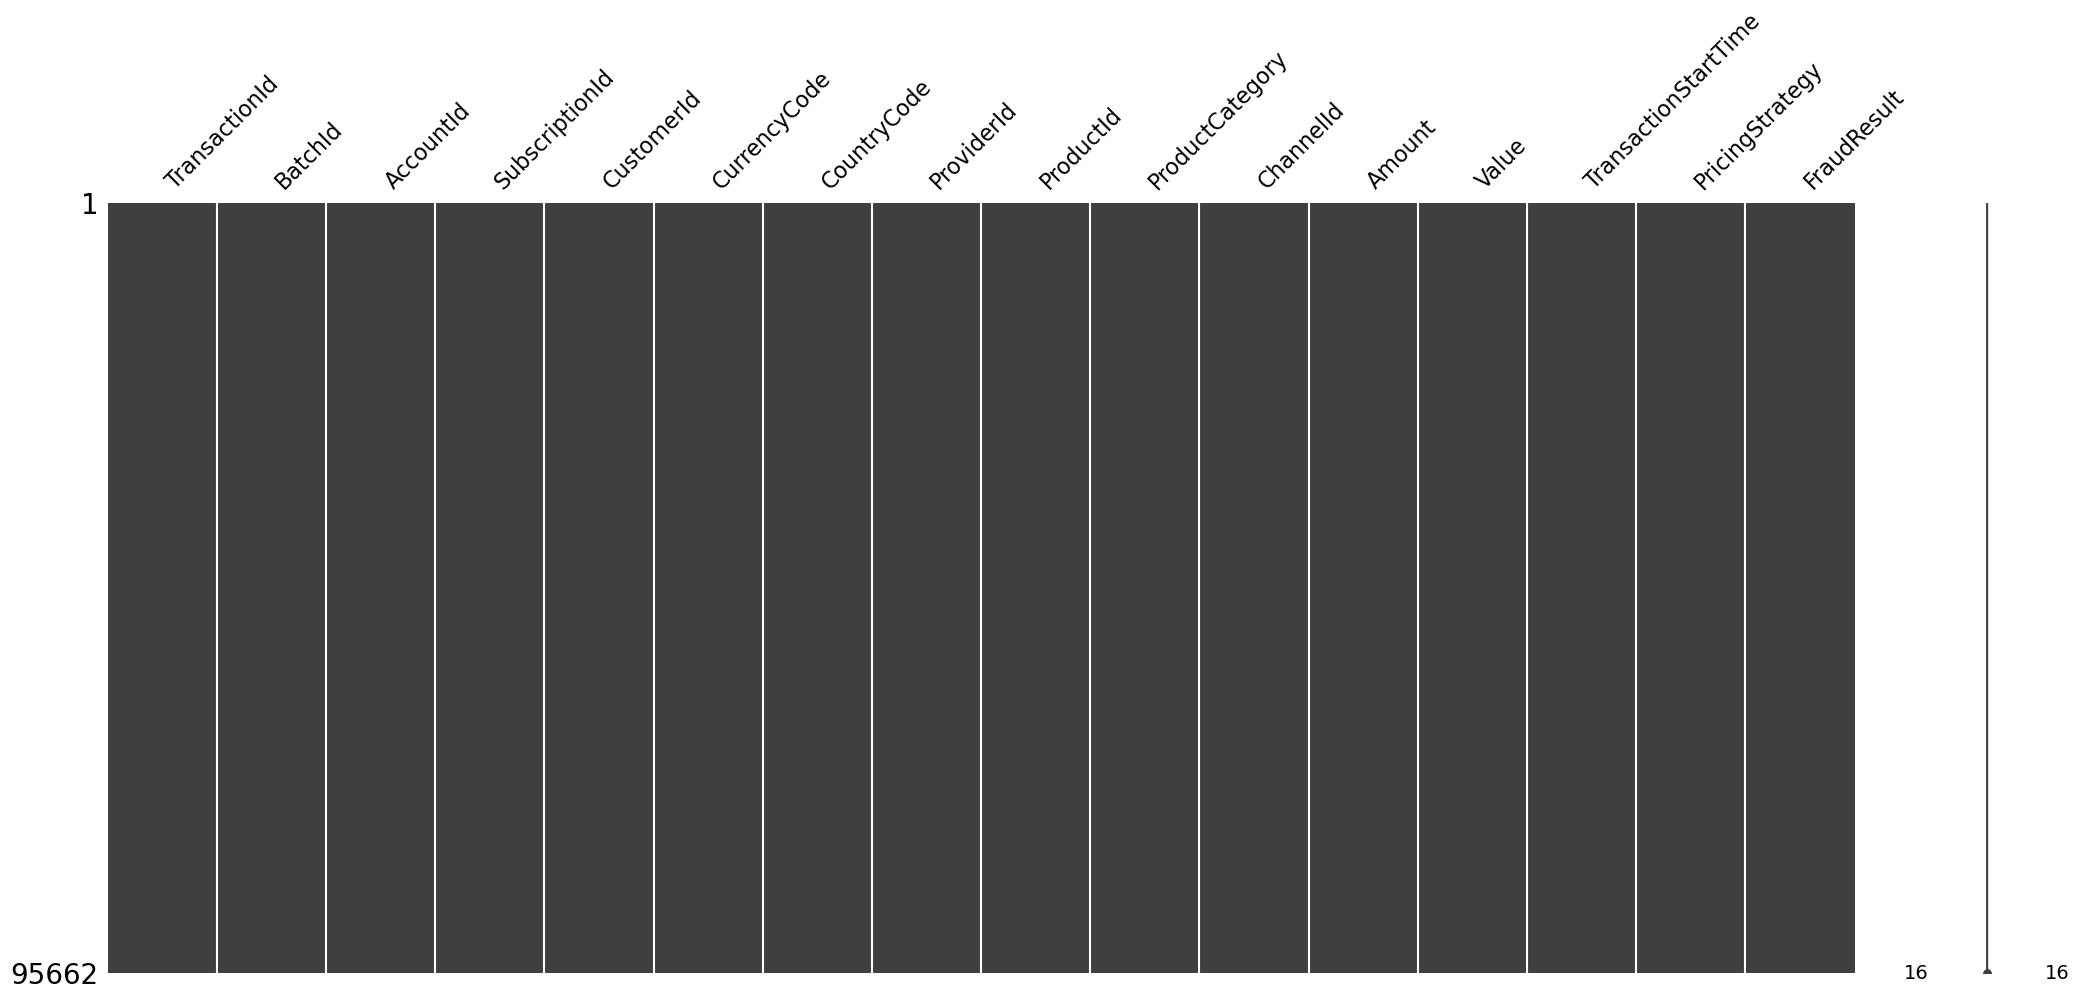

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


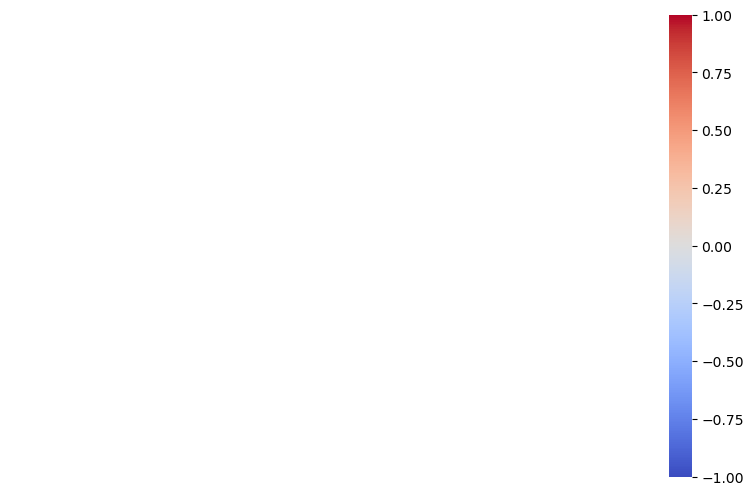

In [9]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])  # Display columns with missing values

# Visualize missing data
import missingno as msno

print("\nVisualizing Missing Data:")
msno.matrix(data)
plt.show()

msno.heatmap(data, cmap="coolwarm", figsize=(10, 6))
plt.show()


### Outlier Detection


Outlier Detection:


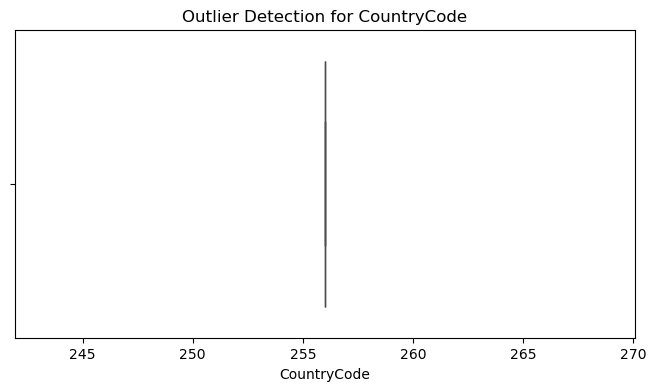

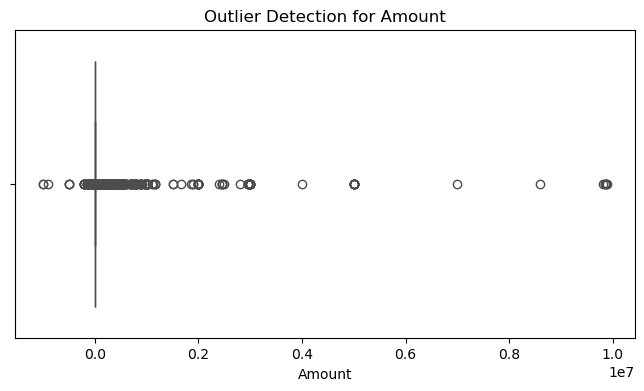

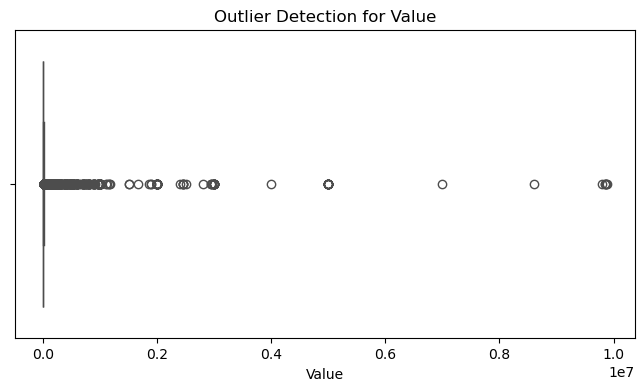

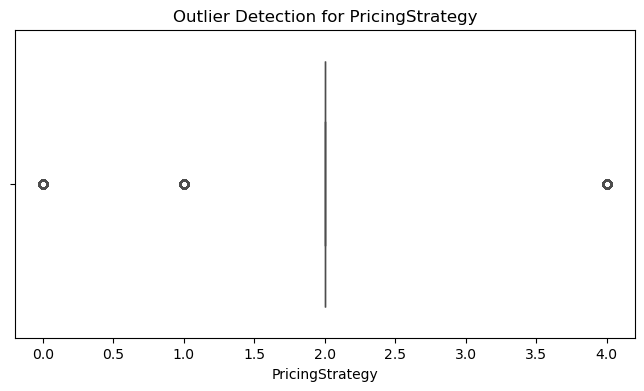

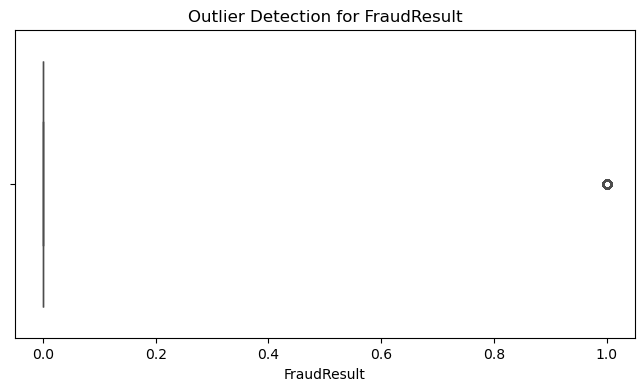

In [ ]:
# Box plots for outlier detection in numerical features
print("\nOutlier Detection:")
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color="orange")
    plt.title(f"Outlier Detection for {col}")
    plt.xlabel(col)
    plt.show()
